In [1]:
from opqua.model import Model

Host-host transmission model with susceptible and infected hosts in a single population scenario, illustrating pathogen evolution through _de novo_ mutations and intra-host competition.

When two pathogens with different genomes meet in the same host (or vector), the pathogen with the most fit genome has a higher probability of being transmitted to another host (or vector). In this case, the transmission rate does NOT vary according to genome. Once an event occurs, however, the pathogen with higher fitness has a higher likelihood of being transmitted.

Here, we define a landscape of stabilizing selection where there is an optimal genome and every other genome is less fit, but fitness functions can be defined in any arbitrary way (accounting for multiple peaks, for instance, or special cases for a specific genome sequence).

## Model initialization and setup

### Create a new `Model` object

In [2]:
model = Model() # Make a new model object.

### Define an optimal genome

In [3]:
my_optimal_genome = 'BEST'

### Define a custom fitness function for the host
Fitness functions must take in **one** argument and return a positive number as a fitness value. Here, we take advantage of one of the preset functions, but you can define it any way you want!

**Stabilizing selection:** any deviation from the "optimal genome" sequence results in an exponential decay in fitness to the `min_fitness` value at the maximum possible distance. Here we use strong selection, with a very low minimum fitness.

In [4]:
def myHostFitness(genome):
    return Model.peakLandscape(
        genome, 
            # Genome to be evaluated (String), the entry for our function.
        peak_genome=my_optimal_genome, 
            # The genome sequence to measure distance against, has value of 1.
        min_value=1e-10
            # Minimum value at maximum distance from optimal genome.
        )

### Define a Setup for our system

Create a new set of parameters called `my_setup` to be used to simulate a population in the model. Use the default parameter set for a _host-host_ model.

In [5]:
model.newSetup(     # Create a new Setup.
    'my_setup',
        # Name of the setup.
    preset='host-host',
        # Use default 'host-host' parameters.
    possible_alleles='ABDEST',
        # Define "letters" in the "genome", or possible alleles for each locus.
        # Each locus can have different possible alleles if you define this
        # argument as a list of strings, but here, we take the simplest
        # approach.
    num_loci=len(my_optimal_genome),
        # Define length of "genome", or total number of alleles.
    fitnessHost=myHostFitness,
        # Assign the fitness function we created (could be a lambda function).
        # In general, a function that evaluates relative fitness in head-to-head 
        # competition for different genomes within the same host. It should be a 
        # functions that recieves a String as an argument and returns a number.
    mutate_in_host=5e-2
        # Modify de novo mutation rate of pathogens when in host to get some
        # evolution!
    )

### Create a population in our model

Create a new population of 100 hosts and 0 vectors called `my_population`. The population uses parameters stored in `my_setup`

In [6]:
model.newPopulation(            # Create a new Population.
    'my_population',
        # Unique identifier for this population in the model.
    'my_setup', 
        # Predefined Setup object with parameters for this population.
    num_hosts=100
        # Number of hosts to initialize population with.
    )

### Manipulate hosts and vectors in the population

We will start off the simulation with a suboptimal pathogen genome, _BADD_. Throughout the course of the simulation, we should see this genome be outcompeted by more optimal pathogen genotypes, culminating in the optimal genome, _BEST_, which outcompetes all others.

In [7]:
model.addPathogensToHosts(    # Add specified pathogens to random hosts.
    'my_population',
        # ID of population to be modified.
    {'BADD':10} 
        # Dictionary containing pathogen genomes to add as keys and 
        # number of hosts each one will be added to as values.
    )

## Model simulation

In [8]:
model.run(  # Simulate model for a specified time between two time points.
    0,      # Initial time point.
    200     # Final time point.
    )

Simulating time: 84.9205322047209, event: CONTACT_HOST_HOST
Simulating time: 139.4831216243728, event: CONTACT_HOST_HOST
Simulating time: 199.83533163204655, event: RECOVER_HOST
Simulating time: 200.0243380253218 END


## Output data manipulation and visualization

### Create a table with the results of the given model history

In [9]:
data = model.saveToDataFrame(   
        # Creates a pandas Dataframe in long format with the given model history, 
        # with one host or vector per simulation time in each row.
    'fitness_function_mutation_example.csv' 
        # Name of the file to save the data to.
    )
data

Saving file...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.19662265031018072s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.019941329956054688s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  58 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.020781755447387695s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  96 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.016440391540527344s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Batch computation too fast (0.02756667137145996s.) Setting batch_size=32.
[Parallel(n_jobs=8)]: Done 288 t

...file saved.


,Time,Population,Organism,ID,Pathogens,Protection,Alive
0,0.0,my_population,Host,my_population_0,NaN,NaN,True
1,0.0,my_population,Host,my_population_1,BADD,NaN,True
2,0.0,my_population,Host,my_population_2,NaN,NaN,True
3,0.0,my_population,Host,my_population_3,NaN,NaN,True
4,0.0,my_population,Host,my_population_4,NaN,NaN,True
...,...,...,...,...,...,...,...
255995,200.0,my_population,Host,my_population_95,NaN,NaN,True
255996,200.0,my_population,Host,my_population_96,NaN,NaN,True
255997,200.0,my_population,Host,my_population_97,NaN,NaN,True
255998,200.0,my_population,Host,my_population_98,BEST,NaN,True


### Create a plot to track pathogen genotypes across time

1 / 103 genotypes processed.
2 / 103 genotypes processed.
3 / 103 genotypes processed.
4 / 103 genotypes processed.
5 / 103 genotypes processed.
6 / 103 genotypes processed.
7 / 103 genotypes processed.
8 / 103 genotypes processed.
9 / 103 genotypes processed.
10 / 103 genotypes processed.
11 / 103 genotypes processed.
12 / 103 genotypes processed.
13 / 103 genotypes processed.
14 / 103 genotypes processed.
15 / 103 genotypes processed.
16 / 103 genotypes processed.
17 / 103 genotypes processed.
18 / 103 genotypes processed.
19 / 103 genotypes processed.
20 / 103 genotypes processed.
21 / 103 genotypes processed.
22 / 103 genotypes processed.
23 / 103 genotypes processed.
24 / 103 genotypes processed.
25 / 103 genotypes processed.
26 / 103 genotypes processed.
27 / 103 genotypes processed.
28 / 103 genotypes processed.
29 / 103 genotypes processed.
30 / 103 genotypes processed.
31 / 103 genotypes processed.
32 / 103 genotypes processed.
33 / 103 genotypes processed.
34 / 103 genotypes 

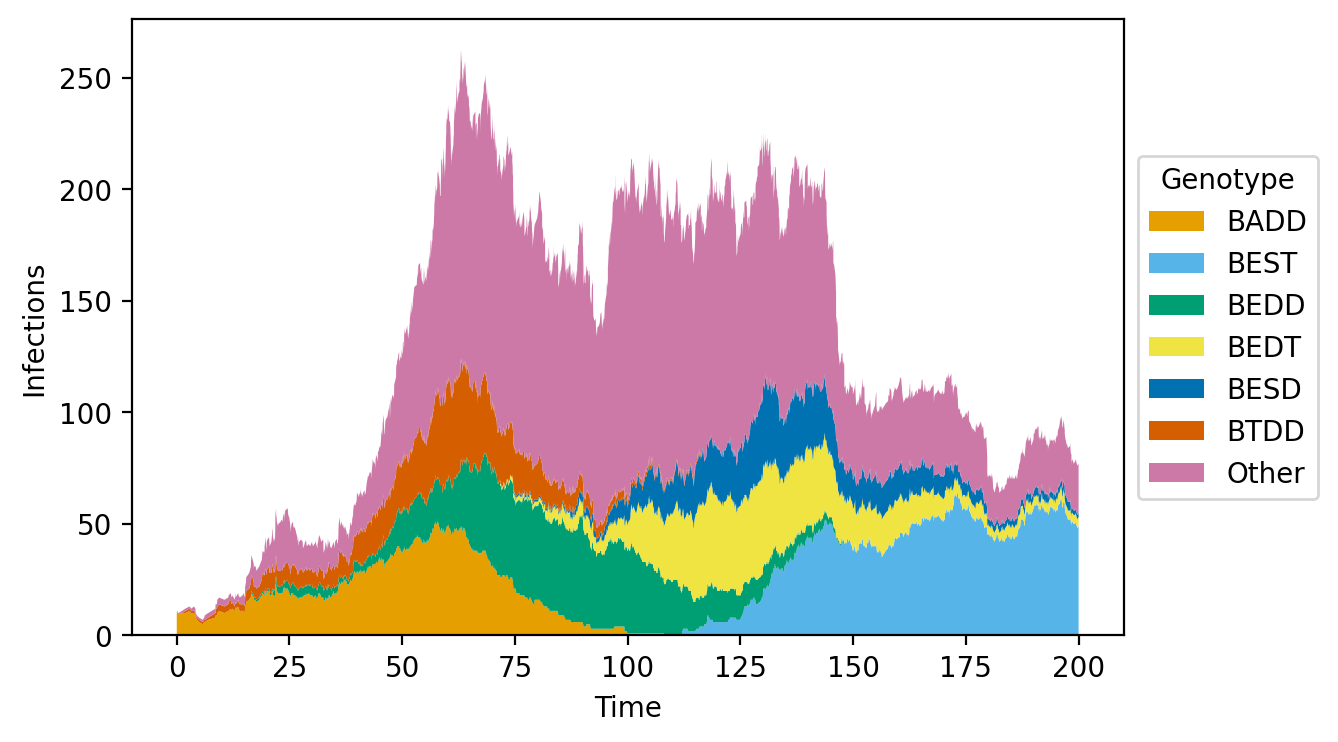

In [10]:
plot_composition = model.compositionPlot(
        # Create a plot to track pathogen genotypes across time.
    'fitness_function_mutation_example_composition.png', 
        # Name of the file to save the plot to.
    data,
        # Dataframe with model history.
    num_top_sequences=6,
        # Track the 6 most represented genomes overall (remaining genotypes are
        # lumped into the "Other" category).
    track_specific_sequences=['BADD']
        # Include the initial genome in the graph if it isn't in the top 6.
    )

### Create a heatmap and dendrogram for pathogen genomes

Generate a heatmap and dendrogram for the top 15 genomes, include the ancestral genome _BADD_ in the phylogeny. Besides creating the plot, outputs the pairwise distance matrix to a csv file as well.

/home/acs98/miniconda3/envs/opqua/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


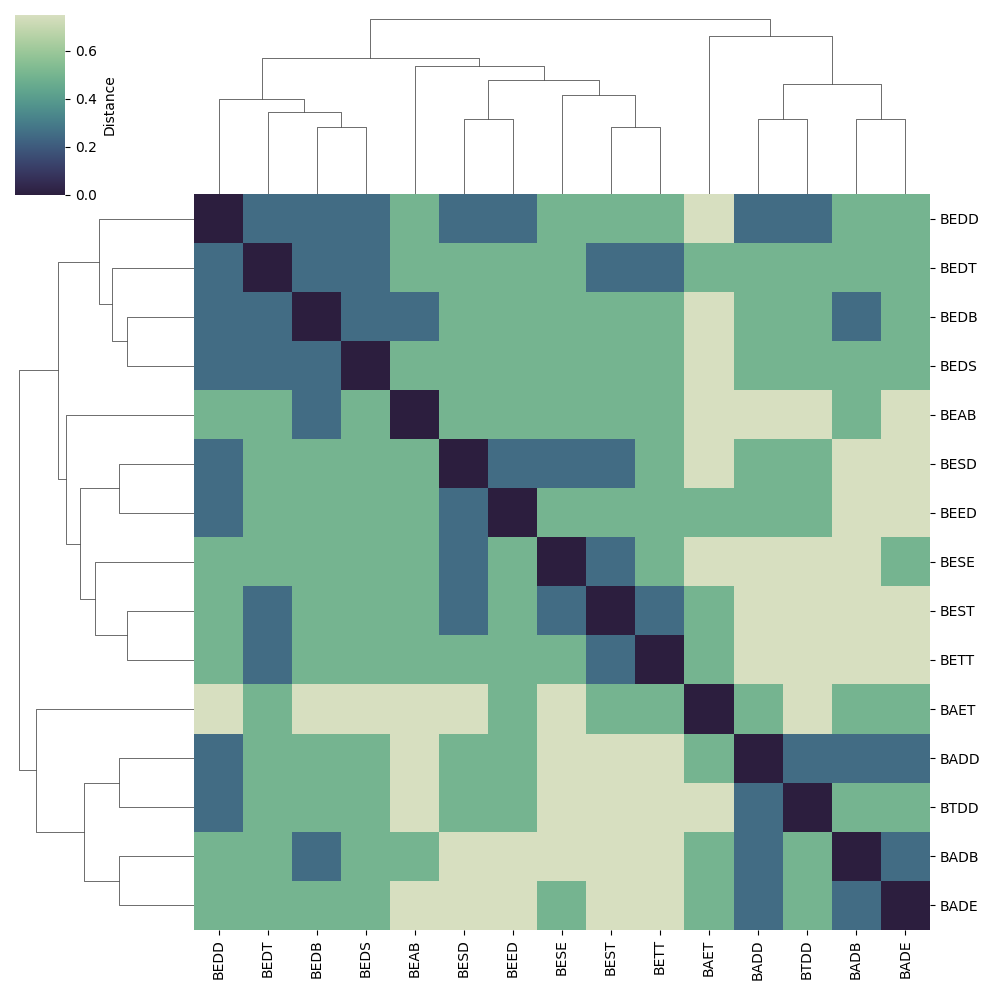

In [11]:
plot_clustermap = model.clustermap(    
        # Create a heatmap and dendrogram for pathogen genomes in data passed.
    'fitness_function_mutation_example_clustermap.png', 
        # File path, name, and extension to save plot under.
    data,
        # Dataframe with model history.
    save_data_to_file='fitness_function_mutation_example_pairwise_distances.csv',
        # File path, name, and extension to save data under.
    num_top_sequences=15,
        # How many sequences to include in matrix.
    track_specific_sequences=['BADD']
        # Specific sequences to include in matrix.
    )

### Create a compartment plot

Plot the number of susceptible and infected hosts in the model over time.

Notice the total number of infections in the composition plot can exceed the number of infected hosts in the compartment plot. This happens because a single host infected by multiple genotypes is counted twice in the former, but not the latter.

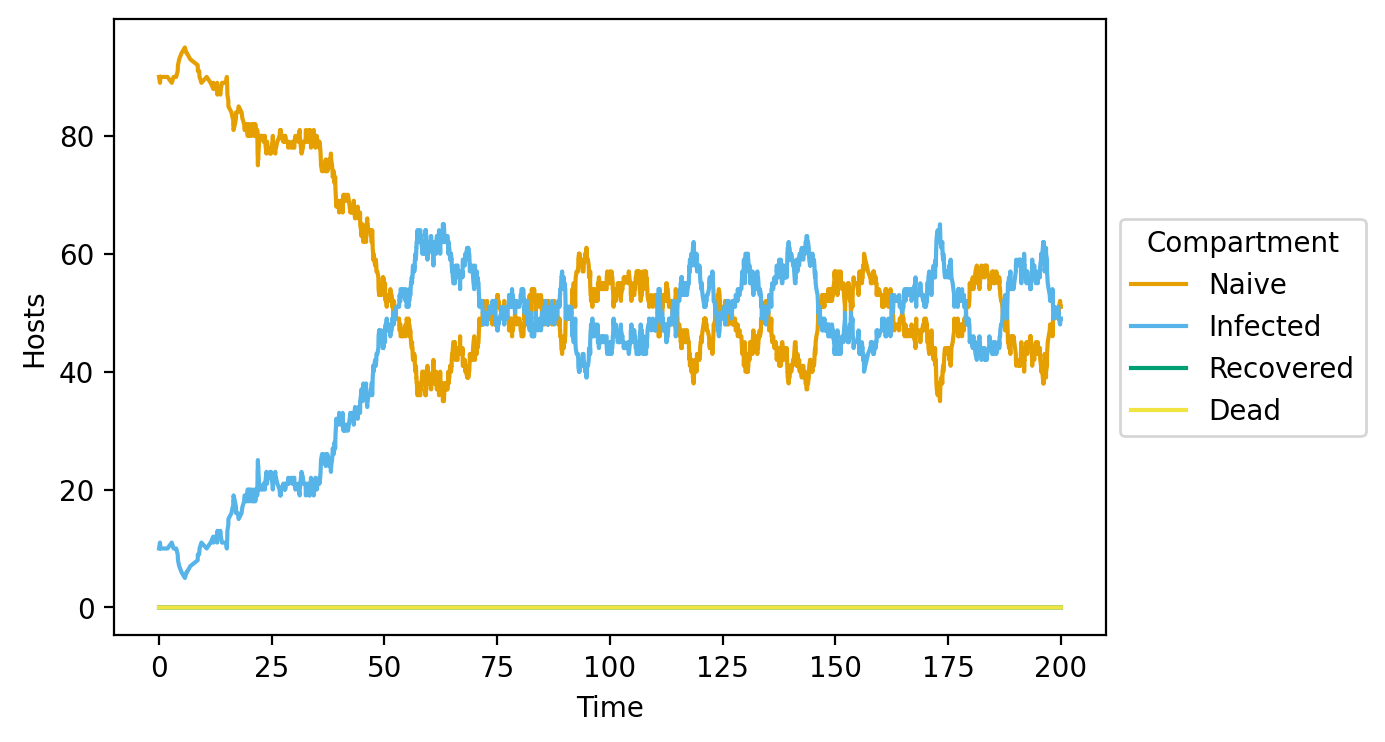

In [12]:
plot_compartments = model.compartmentPlot(
        # Create plot with number of naive, infected, recovered, dead hosts/vectors vs. time.
    'fitness_function_example_reassortment_compartments.png', 
        # File path, name, and extension to save plot under.
    data
        # Dataframe with model history.
    )